In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

In [2]:
df = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_2/data_after_2.csv')
df['gap'] = df.lumo - df.homo
df.head()

A        B      mu  alpha    homo    lumo          u0  lipinskiHBD  \
0  4.15220  1.30144  2.9435  73.48 -0.2206  0.0680 -401.843805          1.0   
1  3.57151  1.05864  1.9151  83.22 -0.2031  0.0778 -404.300200          1.0   
2  1.86470  1.42956  6.4518  78.47 -0.2383  0.0387 -441.526249          3.0   
3  5.53546  1.33654  6.1553  69.36 -0.2341 -0.0088 -429.057325          1.0   
4  3.37315  1.60041  3.4683  67.26 -0.2428 -0.0158 -437.821546          1.0   

   NumRotatableBonds  NumAmideBonds  ...  n7aRing  n5FRing  n6FRing  n7FRing  \
0                1.0            0.0  ...      0.0      0.0      0.0      1.0   
1                1.0            0.0  ...      0.0      1.0      0.0      0.0   
2                3.0            0.0  ...      0.0      0.0      0.0      0.0   
3                0.0            0.0  ...      0.0      0.0      0.0      0.0   
4                1.0            0.0  ...      0.0      0.0      0.0      1.0   

   n8FRing  n9FaRing      GGI4    GGI5  TopoShapeIndex     gap  
0      0.0       0.0  0.538333  0.1250        0.666667  0.2886  
1      0.0       0.0  0.632222  0.0000        0.666667  0.2809  
2      0.0       0.0  0.160000  0.0000        0.666667  0.2770  
3      1.0       0.0  0.120000  0.0625        0.666667  0.2253  
4      0.0       0.0  0.375000  0.0000        1.000000  0.2270  

[5 rows x 147 columns]

Получим информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19914 entries, 0 to 19913
Columns: 147 entries, A to gap
dtypes: float64(147)
memory usage: 22.3 MB


In [4]:
# Подсчитаем кол-во значений NaN
df.isna().sum()

A                 0
B                 0
mu                0
alpha             0
homo              0
                 ..
n9FaRing          0
GGI4              0
GGI5              0
TopoShapeIndex    0
gap               0
Length: 147, dtype: int64

In [5]:
# Подсчитаем дубликаты
df.duplicated().sum()

0

# Выполним небольшой анализ данных

In [6]:
df.describe()

A             B            mu         alpha          homo  \
count  19914.000000  19914.000000  19914.000000  19914.000000  19914.000000   
mean       3.404845      1.388053      2.711136     75.317377     -0.239857   
std        1.388072      0.426059      1.553814      7.875678      0.021919   
min        1.487930      0.340580      0.000000     40.990000     -0.348600   
25%        2.549322      1.088685      1.586825     70.580000     -0.252500   
50%        3.093730      1.368380      2.499750     75.510000     -0.241000   
75%        3.843508      1.650430      3.638400     80.510000     -0.228700   
max       31.686690      5.949580     22.960500    119.230000     -0.117700   

               lumo            u0   lipinskiHBD  NumRotatableBonds  \
count  19914.000000  19914.000000  19914.000000       19914.000000   
mean       0.011191   -411.770948      0.956463           0.925178   
std        0.046537     38.863398      1.021077           1.089583   
min       -0.157800   -621.423548      0.000000           0.000000   
25%       -0.023400   -437.907699      0.000000           0.000000   
50%        0.012000   -417.936487      1.000000           1.000000   
75%        0.048100   -387.052771      1.000000           1.000000   
max        0.105700   -210.001565      6.000000           6.000000   

       NumAmideBonds  ...       n7aRing       n5FRing       n6FRing  \
count   19914.000000  ...  19914.000000  19914.000000  19914.000000   
mean        0.119012  ...      0.002913      0.091242      0.118510   
std         0.372290  ...      0.053891      0.288657      0.323219   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      0.000000   
75%         0.000000  ...      0.000000      0.000000      0.000000   
max         5.000000  ...      1.000000      2.000000      1.000000   

            n7FRing       n8FRing      n9FaRing          GGI4          GGI5  \
count  19914.000000  19914.000000  19914.000000  19914.000000  19914.000000   
mean       0.100432      0.076780      0.001758      0.216257      0.033435   
std        0.300582      0.266249      0.041887      0.123507      0.049448   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.125000      0.000000   
50%        0.000000      0.000000      0.000000      0.222222      0.000000   
75%        0.000000      0.000000      0.000000      0.302222      0.062500   
max        1.000000      1.000000      1.000000      0.722222      0.285000   

       TopoShapeIndex           gap  
count    19914.000000  19914.000000  
mean         0.759909      0.251048  
std          0.234224      0.047265  
min          0.000000      0.062300  
25%          0.666667      0.216400  
50%          0.666667      0.249600  
75%          1.000000      0.288200  
max          1.000000      0.430600  

[8 rows x 147 columns]

Построим тепловую карту матрицы ковариации для первых 10 столбцов

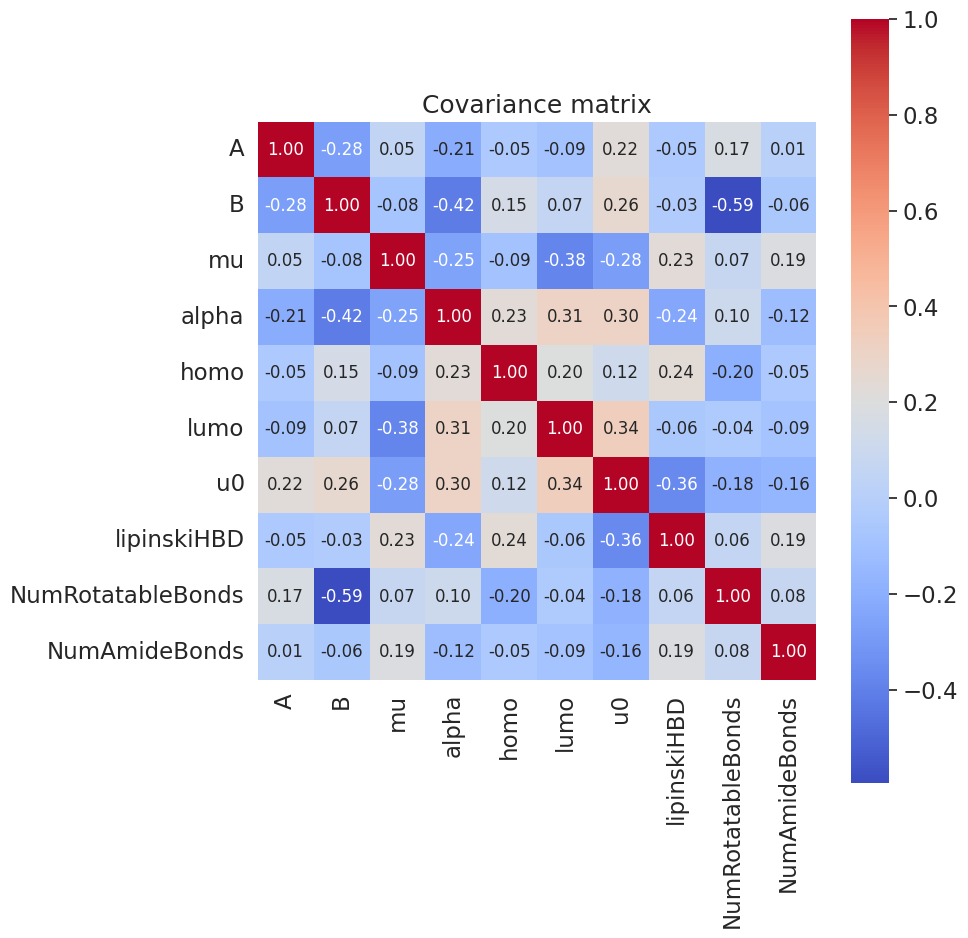

In [8]:
cols = df.columns[:10]

stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(10)].values)

cov_mat =np.cov(X_std.T)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix', size = 18)
plt.tight_layout()
plt.show()

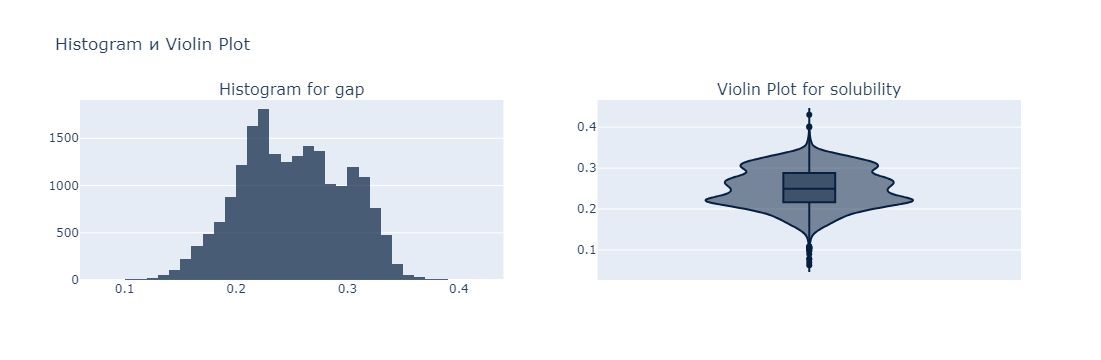

In [9]:
#Для примера построим график распределения целевого параметра
fig = make_subplots(rows=1, cols=2, subplot_titles=['Histogram for gap', 'Violin Plot for solubility'])

# Histogram
hist_fig = px.histogram(df, x="gap", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Adding a graph indicating the location

# Violin plot
violin_fig = px.violin(df, y="gap", color_discrete_sequence = colors, box = True)
fig.add_trace(violin_fig['data'][0], row=1, col=2) # Adding a graph indicating the location

# Setting up the layout
fig.update_layout(showlegend=False, title_text="Histogram и Violin Plot")

# Graph display
fig.show()

Из построенной гистограммы видно, что распределение целевого параметра нормальное

# Выполним нормализацию методом IQR

Почистим все параметры от выбросов

In [10]:
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
        data (DataFrame): Input DataFrame.
        threshold (float): Multiplier for the IQR to determine the outlier cutoff.

    Returns:
        outliers_dict (dict): Dictionary containing outlier indices for each numeric column.
    """
    outliers_dict = {}
    for column in data.select_dtypes(include='float64').columns:
        # Вычисляем первый и третий квартили
        quartile_1, quartile_3 = np.percentile(data[column], [25, 75])
        # Вычисляем межквартильный размах (IQR)
        iqr = quartile_3 - quartile_1
        # Вычисляем нижнюю и верхнюю границы для определения выбросов
        lower_bound = quartile_1 - (threshold * iqr)
        upper_bound = quartile_3 + (threshold * iqr)
        # Находим индексы выбросов
        outliers = np.where((data[column] < lower_bound) | (data[column] > upper_bound))[0]
        # Сохраняем индексы выбросов в словаре
        outliers_dict[column] = outliers
    return outliers_dict

# Пример использования:
outliers_dict = detect_outliers_iqr(df)
for column, outliers in outliers_dict.items():
    print(f"Indices of outliers in column '{column}':", outliers)
    print(f"Outlier values in column '{column}':", [df[column][i] for i in outliers])

# Потом можно удалить выбросы, используя словарь outliers_dict
for column, outliers in outliers_dict.items():
    df = df.drop(outliers)

Indices of outliers in column 'A': [   28    51    56 ... 19778 19873 19912]
Outlier values in column 'A': [6.54728, 5.95584, 5.97583, 7.55328, 7.7182, 6.00282, 6.429, 6.05336, 6.09744, 6.43645, 6.20246, 7.10967, 6.2194, 6.17342, 6.6856, 7.65518, 5.81881, 6.72544, 7.62965, 6.02522, 7.52643, 9.90773, 6.59471, 6.86029, 7.05291, 7.09407, 6.41014, 5.83554, 6.86316, 7.03253, 6.05106, 7.11207, 6.58257, 6.31598, 8.98436, 6.35973, 7.06519, 5.8832, 6.52481, 6.33957, 6.85317, 6.7294, 5.88996, 8.68697, 7.96627, 6.99638, 5.82645, 5.90005, 6.41728, 6.33947, 6.2401, 6.43145, 8.25636, 6.31951, 6.82135, 6.621, 7.28289, 6.92653, 6.85545, 6.69181, 6.30421, 7.88278, 6.34825, 6.05006, 8.35462, 6.45782, 7.03674, 5.83211, 7.75605, 6.33181, 6.75459, 6.06599, 5.83927, 5.85261, 5.93808, 5.99752, 6.21933, 8.27279, 5.84661, 8.04673, 7.26428, 6.26038, 7.62783, 6.076, 6.40061, 6.95112, 8.50246, 6.40989, 8.91276, 9.5789, 7.03818, 6.05407, 6.30643, 6.238, 7.55069, 6.71679, 7.27236, 6.05752, 9.62372, 7.49969, 6.91945

KeyError: '[385, 1292, 1534, 1588, 2183, 2241, 2777, 3643, 4652, 4945, 5389, 5874, 6248, 6706, 6755, 7447, 7931, 8129, 8956, 9582, 10284, 10694, 10871, 10979, 12176, 13310, 13833, 15147, 16050, 17325, 17750, 18046, 18210, 18286, 18743, 18925, 18995, 19115, 19338] not found in axis'

In [11]:
df.reset_index(drop=True, inplace=True)
df.head()

A        B      mu  alpha    homo    lumo          u0  lipinskiHBD  \
0  4.15220  1.30144  2.9435  73.48 -0.2206  0.0680 -401.843805          1.0   
1  3.57151  1.05864  1.9151  83.22 -0.2031  0.0778 -404.300200          1.0   
2  1.86470  1.42956  6.4518  78.47 -0.2383  0.0387 -441.526249          3.0   
3  5.53546  1.33654  6.1553  69.36 -0.2341 -0.0088 -429.057325          1.0   
4  3.37315  1.60041  3.4683  67.26 -0.2428 -0.0158 -437.821546          1.0   

   NumRotatableBonds  NumAmideBonds  ...  n7aRing  n5FRing  n6FRing  n7FRing  \
0                1.0            0.0  ...      0.0      0.0      0.0      1.0   
1                1.0            0.0  ...      0.0      1.0      0.0      0.0   
2                3.0            0.0  ...      0.0      0.0      0.0      0.0   
3                0.0            0.0  ...      0.0      0.0      0.0      0.0   
4                1.0            0.0  ...      0.0      0.0      0.0      1.0   

   n8FRing  n9FaRing      GGI4    GGI5  TopoShapeIndex     gap  
0      0.0       0.0  0.538333  0.1250        0.666667  0.2886  
1      0.0       0.0  0.632222  0.0000        0.666667  0.2809  
2      0.0       0.0  0.160000  0.0000        0.666667  0.2770  
3      1.0       0.0  0.120000  0.0625        0.666667  0.2253  
4      0.0       0.0  0.375000  0.0000        1.000000  0.2270  

[5 rows x 147 columns]

Проведем нормализацию

In [12]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.iloc[:, :])
normalized_data

array([[0.62016592, 0.2341608 , 0.12819843, ..., 0.43859649, 0.66666667,
        0.59636157],
       [0.48499788, 0.17008885, 0.08340846, ..., 0.        , 0.66666667,
        0.57447413],
       [0.08770129, 0.2679701 , 0.28099562, ..., 0.        , 0.66666667,
        0.56338829],
       ...,
       [0.24098127, 0.22675611, 0.13227064, ..., 0.21929825, 0.66666667,
        0.52643547],
       [0.4200756 , 0.20950576, 0.11807234, ..., 0.28070175, 0.66666667,
        0.50085276],
       [0.63876668, 0.1372533 , 0.05263823, ..., 0.28070175, 0.66666667,
        0.42040932]])

In [13]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [14]:
normalized_df.head()

A         B        mu     alpha      homo      lumo        u0  \
0  0.620166  0.234161  0.128198  0.508690  0.554353  0.856926  0.625002   
1  0.484998  0.170089  0.083408  0.661187  0.630143  0.894118  0.618011   
2  0.087701  0.267970  0.280996  0.586817  0.477696  0.745731  0.512052   
3  0.942149  0.243423  0.268082  0.444183  0.495886  0.565465  0.547543   
4  0.438825  0.313055  0.151055  0.411304  0.458207  0.538899  0.522597   

   lipinskiHBD  NumRotatableBonds  NumAmideBonds  ...  n7aRing  n5FRing  \
0     0.166667           0.166667            0.0  ...      0.0      0.0   
1     0.166667           0.166667            0.0  ...      0.0      0.5   
2     0.500000           0.500000            0.0  ...      0.0      0.0   
3     0.166667           0.000000            0.0  ...      0.0      0.0   
4     0.166667           0.166667            0.0  ...      0.0      0.0   

   n6FRing  n7FRing  n8FRing  n9FaRing      GGI4      GGI5  TopoShapeIndex  \
0      0.0      1.0      0.0       0.0  0.745385  0.438596        0.666667   
1      0.0      0.0      0.0       0.0  0.875385  0.000000        0.666667   
2      0.0      0.0      0.0       0.0  0.221538  0.000000        0.666667   
3      0.0      0.0      1.0       0.0  0.166154  0.219298        0.666667   
4      0.0      1.0      0.0       0.0  0.519231  0.000000        1.000000   

        gap  
0  0.596362  
1  0.574474  
2  0.563388  
3  0.416430  
4  0.421262  

[5 rows x 147 columns]

In [15]:
normalized_df.to_csv('data_after_3.csv', index=False)